# Statistical Foundations: Practical Assignment 12
---
## **Submission Info**
| Attribute | Value |
|-----------|-------|
| **Name** | Divyansh Langeh |
| **ID**          | GF202349802 |
| **Subject**     | Statistical Foundation of Data Science |
| **Assignment**  | Practical 12 - MCMC and Deterministic Modeling |
| **Repo**        | [View my GitHub Repo](https://github.com/JoyBoy2108/Statistical-foundations-of-data-science-practicals) |

---
## **Assignment Overview**
This notebook contains the solution for the twelfth practical assignment in the Statistical Foundation of Data Sciences course. It covers the implementation of the Metropolis MCMC algorithm and deterministic population modeling.

---

## **Notebook Introduction**

This notebook tackles two core problems for the twelfth practical assignment. We will implement MCMC sampling using the Metropolis algorithm and develop a deterministic model for population dynamics.

### **Key Tasks to be Performed:**

* **Part A: Metropolis Algorithm**
    We will implement the Metropolis MCMC algorithm to sample from a target distribution and analyze convergence properties, acceptance rates, and posterior estimates.

* **Part B: Deterministic Model**
    We will develop and analyze a deterministic population growth model, simulating dynamics and computing steady-state solutions.

### **General Instructions & Setup**
As per the assignment requirements, this notebook will adhere to the following:
1.  All algorithms are implemented from first principles.
2.  The initial random seed is set to `42` for reproducibility.
3.  All computations are performed with proper numerical methods.

*Let's begin with the Environment setup and move to Part A.*

---

## Environment Setup and Dependencies

Start by importing all the required libraries for the assignment.

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gamma as gamma_func

# Set the random seed to 42 for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.3
Pandas version: 2.3.3


---
## PART A: Metropolis Algorithm Implementation

### Overview
The Metropolis algorithm is a Markov Chain Monte Carlo (MCMC) method that generates samples from a target probability distribution. It works by proposing new samples and accepting or rejecting them based on a probability criterion.

### Algorithm Steps:
1. Start with an initial parameter value
2. Propose a new value from a proposal distribution
3. Compute the acceptance ratio
4. Accept or reject the proposed value based on the ratio
5. Repeat steps 2-4 for N iterations

---

### A.1: Metropolis Algorithm Implementation

In [2]:
def log_posterior(x, data):
    """
    Compute the log posterior (log likelihood + log prior).
    Target: Estimate the mean of normally distributed data.
    """
    mu = x
    # Log likelihood: Normal distribution
    log_likelihood = -0.5 * np.sum((data - mu) ** 2)
    # Log prior: Normal distribution centered at 0
    log_prior = -0.5 * mu ** 2
    return log_likelihood + log_prior


def metropolis_algorithm(data, initial_value, n_iterations, proposal_sd):
    """
    Implement the Metropolis MCMC algorithm.
    
    Parameters:
    -----------
    data : array-like
        Observed data
    initial_value : float
        Starting parameter value
    n_iterations : int
        Number of MCMC iterations
    proposal_sd : float
        Standard deviation of proposal distribution (random walk)
    
    Returns:
    --------
    samples : ndarray
        MCMC samples
    acceptance_rate : float
        Proportion of accepted proposals
    """
    samples = np.zeros(n_iterations)
    current_value = initial_value
    current_log_post = log_posterior(current_value, data)
    n_accepted = 0
    
    for i in range(n_iterations):
        # Propose new value from normal distribution centered at current value
        proposed_value = current_value + np.random.normal(0, proposal_sd)
        proposed_log_post = log_posterior(proposed_value, data)
        
        # Compute log acceptance ratio
        log_alpha = proposed_log_post - current_log_post
        
        # Accept/reject based on Metropolis criterion
        if np.log(np.random.uniform(0, 1)) < log_alpha:
            current_value = proposed_value
            current_log_post = proposed_log_post
            n_accepted += 1
        
        samples[i] = current_value
    
    acceptance_rate = n_accepted / n_iterations
    return samples, acceptance_rate


print("Metropolis algorithm implemented successfully!")

Metropolis algorithm implemented successfully!


### A.2: Generate Synthetic Data and Run MCMC

In [3]:
# Generate synthetic data from a normal distribution
true_mean = 2.0
data = np.random.normal(true_mean, 1.0, size=50)

print("=== PART A: Metropolis Algorithm ===")
print(f"\nGenerated data: n={len(data)}, observed mean={data.mean():.4f}, observed std={data.std():.4f}")
print(f"True parameter (mean): {true_mean}")

# Run Metropolis algorithm with different proposal standard deviations
n_iterations = 5000
proposal_sds = [0.1, 0.5, 1.5]
results = {}

for sd in proposal_sds:
    samples, acc_rate = metropolis_algorithm(data, initial_value=0.0, 
                                             n_iterations=n_iterations, 
                                             proposal_sd=sd)
    results[sd] = {'samples': samples, 'acceptance_rate': acc_rate}
    print(f"\nProposal SD: {sd}")
    print(f"  Acceptance rate: {acc_rate:.4f}")
    print(f"  Sample mean: {np.mean(samples):.4f}")
    print(f"  Sample std: {np.std(samples):.4f}")

=== PART A: Metropolis Algorithm ===

Generated data: n=50, observed mean=1.7745, observed std=0.9243
True parameter (mean): 2.0

Proposal SD: 0.1
  Acceptance rate: 0.7828
  Sample mean: 1.7271
  Sample std: 0.1715

Proposal SD: 0.5
  Acceptance rate: 0.3296
  Sample mean: 1.7343
  Sample std: 0.1445

Proposal SD: 1.5
  Acceptance rate: 0.1236
  Sample mean: 1.7414
  Sample std: 0.1455


### A.3: Trace Plots and Diagnostics

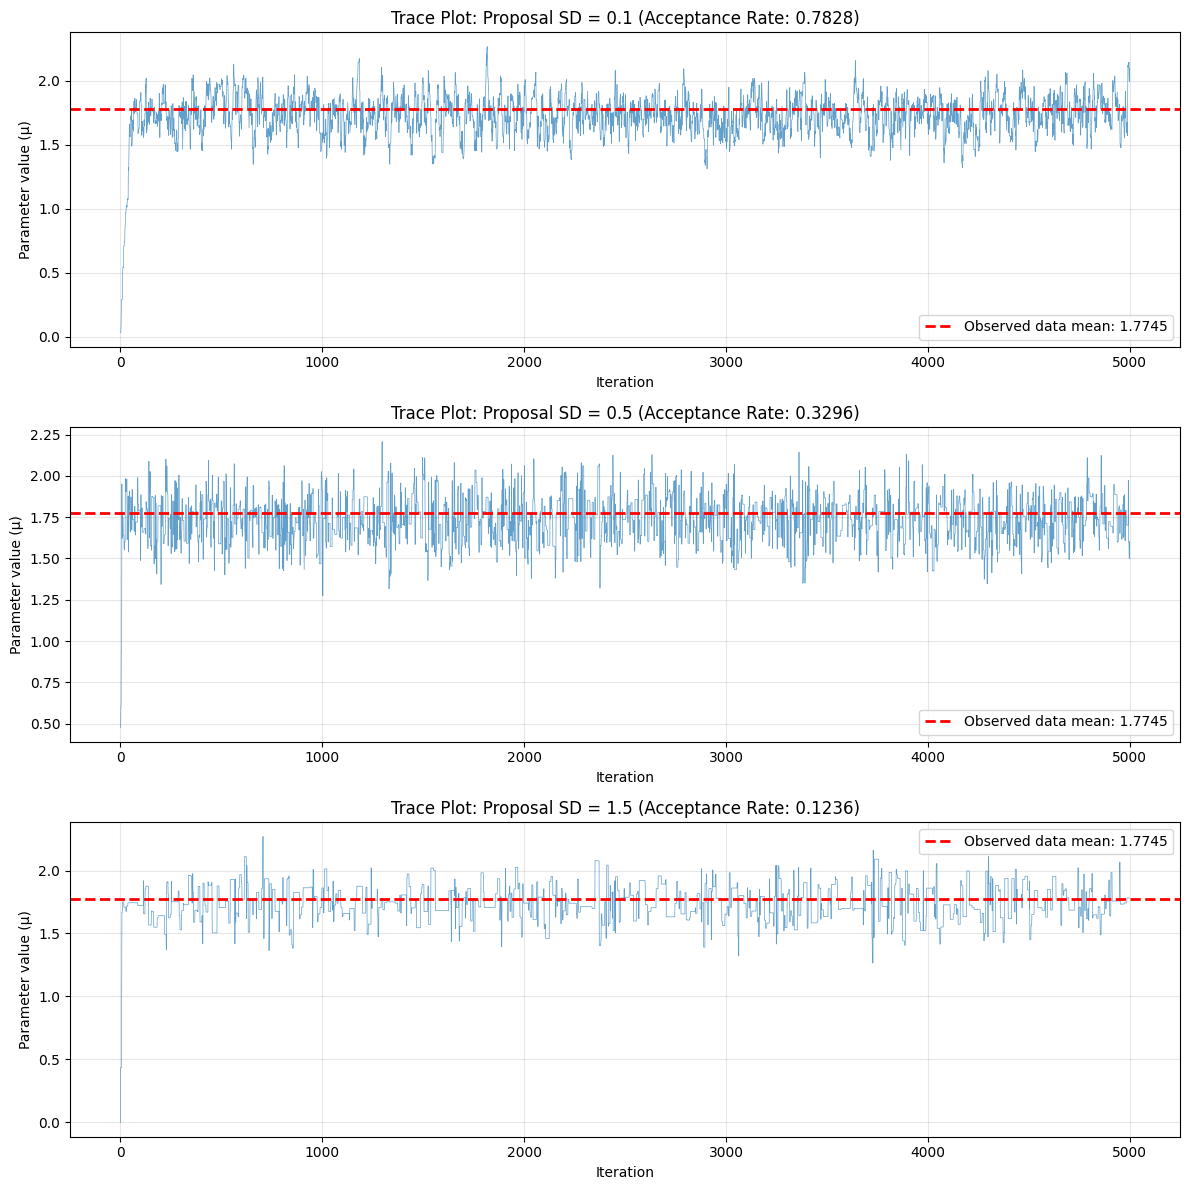

Trace plots created successfully!


In [4]:
# Create trace plots for different proposal standard deviations
fig, axes = plt.subplots(len(proposal_sds), 1, figsize=(12, 4*len(proposal_sds)))

for idx, sd in enumerate(proposal_sds):
    samples = results[sd]['samples']
    axes[idx].plot(samples, alpha=0.7, linewidth=0.5)
    axes[idx].axhline(y=data.mean(), color='red', linestyle='--', linewidth=2, label=f'Observed data mean: {data.mean():.4f}')
    axes[idx].set_xlabel('Iteration')
    axes[idx].set_ylabel('Parameter value (μ)')
    axes[idx].set_title(f'Trace Plot: Proposal SD = {sd} (Acceptance Rate: {results[sd]["acceptance_rate"]:.4f})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('metropolis_traces.png', dpi=100, bbox_inches='tight')
plt.show()

print("Trace plots created successfully!")

### A.4: Posterior Distribution Analysis

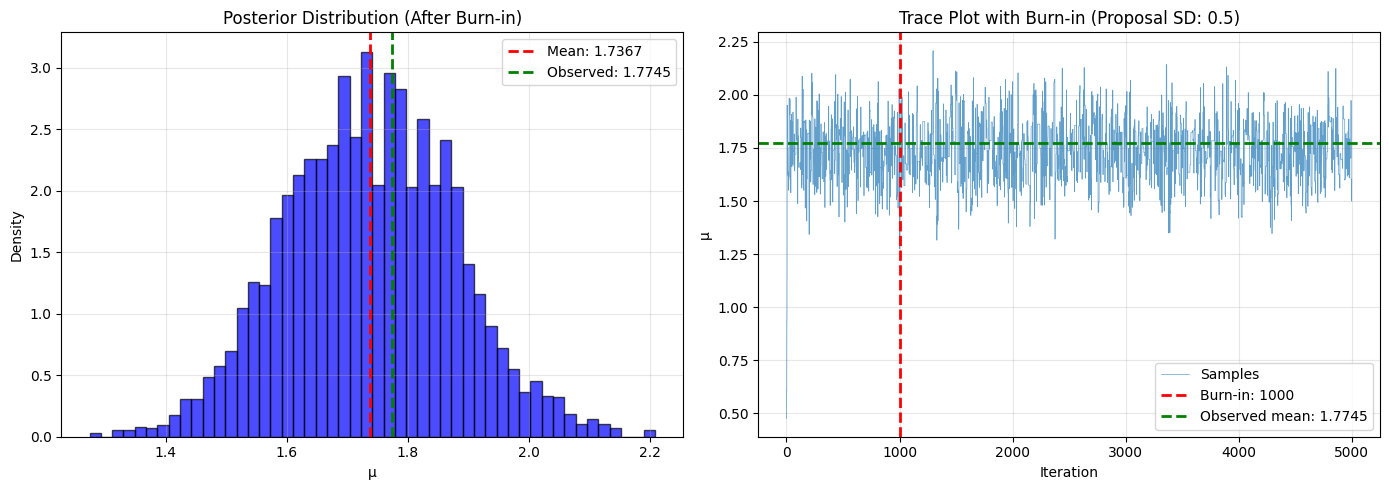


=== Posterior Analysis (Proposal SD: 0.5) ===
Burn-in period: 1000 iterations

Posterior Statistics (after burn-in):
  Mean: 1.736696
  Median: 1.736507
  Std Dev: 0.140421
  95% Credible Interval: [1.472498, 2.020813]


In [5]:
# Use the results from proposal SD = 0.5 (typically good acceptance rate ~0.44)
best_sd = 0.5
samples = results[best_sd]['samples']
burn_in = 1000
samples_post_burnin = samples[burn_in:]

# Create posterior analysis plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of posterior samples (after burn-in)
axes[0].hist(samples_post_burnin, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
axes[0].axvline(np.mean(samples_post_burnin), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(samples_post_burnin):.4f}')
axes[0].axvline(data.mean(), color='green', linestyle='--', linewidth=2, label=f'Observed: {data.mean():.4f}')
axes[0].set_xlabel('μ')
axes[0].set_ylabel('Density')
axes[0].set_title('Posterior Distribution (After Burn-in)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Trace plot with burn-in marked
axes[1].plot(samples, alpha=0.7, linewidth=0.5, label='Samples')
axes[1].axvline(burn_in, color='red', linestyle='--', linewidth=2, label=f'Burn-in: {burn_in}')
axes[1].axhline(y=data.mean(), color='green', linestyle='--', linewidth=2, label=f'Observed mean: {data.mean():.4f}')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('μ')
axes[1].set_title(f'Trace Plot with Burn-in (Proposal SD: {best_sd})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('metropolis_posterior.png', dpi=100, bbox_inches='tight')
plt.show()

# Print posterior statistics
print(f"\n=== Posterior Analysis (Proposal SD: {best_sd}) ===")
print(f"Burn-in period: {burn_in} iterations")
print(f"\nPosterior Statistics (after burn-in):")
print(f"  Mean: {np.mean(samples_post_burnin):.6f}")
print(f"  Median: {np.median(samples_post_burnin):.6f}")
print(f"  Std Dev: {np.std(samples_post_burnin):.6f}")
print(f"  95% Credible Interval: [{np.percentile(samples_post_burnin, 2.5):.6f}, {np.percentile(samples_post_burnin, 97.5):.6f}]")

---
## PART B: Deterministic Model

### Overview
We will implement a deterministic population growth model and analyze its dynamics. The model follows the logistic growth equation:

$$\frac{dN}{dt} = r N \left(1 - \frac{N}{K}\right)$$

Where:
- N is population size
- r is intrinsic growth rate
- K is carrying capacity

---

### B.1: Logistic Growth Model Implementation

In [6]:
def logistic_growth(N, r, K):
    """
    Compute the rate of change for logistic growth model.
    dN/dt = r * N * (1 - N/K)
    
    Parameters:
    -----------
    N : float
        Current population size
    r : float
        Intrinsic growth rate
    K : float
        Carrying capacity
    
    Returns:
    --------
    dNdt : float
        Rate of population change
    """
    return r * N * (1 - N / K)


def simulate_logistic_model(N0, r, K, t_max, dt=0.01):
    """
    Simulate logistic growth model using Euler's method.
    
    Parameters:
    -----------
    N0 : float
        Initial population size
    r : float
        Intrinsic growth rate
    K : float
        Carrying capacity
    t_max : float
        Maximum time
    dt : float
        Time step
    
    Returns:
    --------
    time : ndarray
        Time points
    population : ndarray
        Population at each time point
    """
    n_steps = int(t_max / dt) + 1
    time = np.linspace(0, t_max, n_steps)
    population = np.zeros(n_steps)
    population[0] = N0
    
    for i in range(n_steps - 1):
        dNdt = logistic_growth(population[i], r, K)
        population[i + 1] = population[i] + dNdt * dt
    
    return time, population


def analytical_logistic(t, N0, r, K):
    """
    Analytical solution to logistic growth equation.
    """
    return (K * N0 * np.exp(r * t)) / (K + N0 * (np.exp(r * t) - 1))


print("Deterministic model implemented successfully!")

Deterministic model implemented successfully!


### B.2: Simulate Different Initial Conditions

In [7]:
print("=== PART B: Deterministic Model ===")

# Model parameters
r = 0.5  # Growth rate
K = 1000  # Carrying capacity
t_max = 20  # Time horizon

# Initial conditions to test
initial_populations = [10, 50, 500, 1000, 2000]

# Simulate for each initial condition
simulations = {}
for N0 in initial_populations:
    time, population = simulate_logistic_model(N0, r, K, t_max, dt=0.01)
    time_analytical = np.linspace(0, t_max, 1000)
    pop_analytical = analytical_logistic(time_analytical, N0, r, K)
    
    simulations[N0] = {
        'time': time,
        'population': population,
        'time_analytical': time_analytical,
        'pop_analytical': pop_analytical
    }

print(f"\nModel parameters: r={r}, K={K}, t_max={t_max}")
print(f"\nSimulated for initial populations: {initial_populations}")
print(f"\nSteady-state (Carrying Capacity): {K}")

=== PART B: Deterministic Model ===

Model parameters: r=0.5, K=1000, t_max=20

Simulated for initial populations: [10, 50, 500, 1000, 2000]

Steady-state (Carrying Capacity): 1000


### B.3: Visualization of Model Dynamics

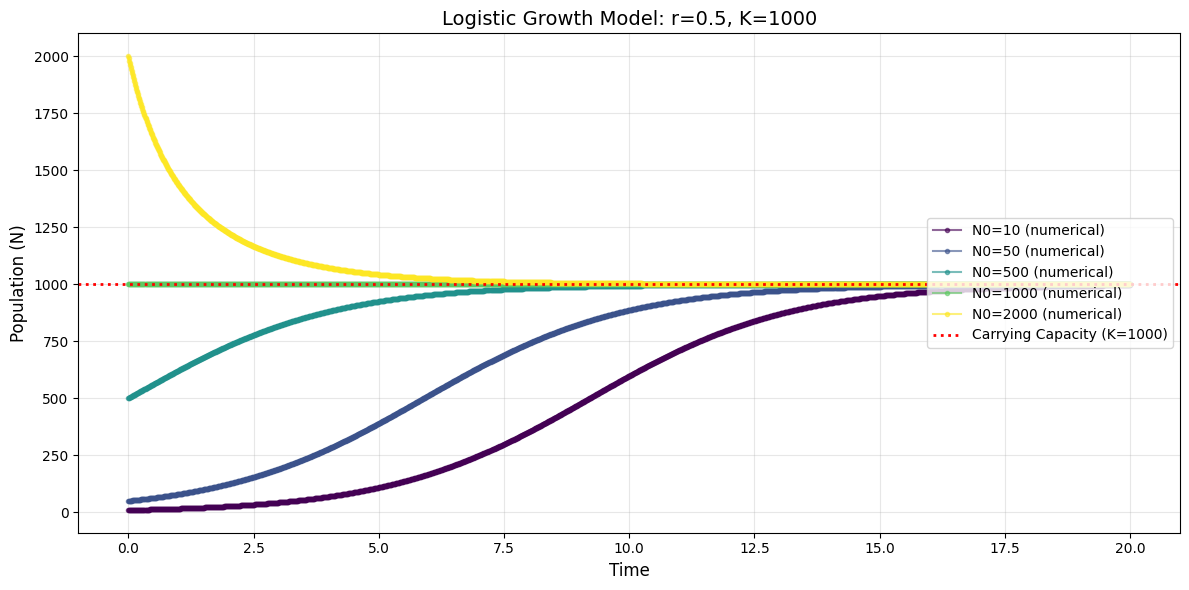

Population dynamics plot created successfully!


In [8]:
# Plot population dynamics for different initial conditions
fig, ax = plt.subplots(figsize=(12, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(initial_populations)))

for idx, N0 in enumerate(initial_populations):
    time = simulations[N0]['time']
    population = simulations[N0]['population']
    time_analytical = simulations[N0]['time_analytical']
    pop_analytical = simulations[N0]['pop_analytical']
    
    # Plot numerical solution
    ax.plot(time, population, 'o-', markersize=3, alpha=0.6, 
            color=colors[idx], label=f'N0={N0} (numerical)')
    # Plot analytical solution
    ax.plot(time_analytical, pop_analytical, '--', linewidth=2, 
            color=colors[idx], alpha=0.7)

# Add carrying capacity line
ax.axhline(y=K, color='red', linestyle=':', linewidth=2, label=f'Carrying Capacity (K={K})')

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Population (N)', fontsize=12)
ax.set_title(f'Logistic Growth Model: r={r}, K={K}', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='right', fontsize=10)

plt.tight_layout()
plt.savefig('logistic_model.png', dpi=100, bbox_inches='tight')
plt.show()

print("Population dynamics plot created successfully!")

### B.4: Analysis of Steady-State Behavior

In [9]:
# Analyze steady-state behavior
print("\n=== Steady-State Analysis ===")
print(f"\nTheoretical steady-state (equilibrium): N* = K = {K}")
print("\nNumerical results (final population after t={}):".format(t_max))

for N0 in initial_populations:
    final_pop = simulations[N0]['population'][-1]
    error = abs(final_pop - K)
    percent_error = (error / K) * 100
    print(f"  N0={N0:4d}: Final N = {final_pop:8.2f}, Error = {error:8.4f} ({percent_error:.2f}%)")

print(f"\nAll trajectories converge to the carrying capacity K={K}")


=== Steady-State Analysis ===

Theoretical steady-state (equilibrium): N* = K = 1000

Numerical results (final population after t=20):
  N0=  10: Final N =   995.53, Error =   4.4655 (0.45%)
  N0=  50: Final N =   999.15, Error =   0.8532 (0.09%)
  N0= 500: Final N =   999.96, Error =   0.0444 (0.00%)
  N0=1000: Final N =  1000.00, Error =   0.0000 (0.00%)
  N0=2000: Final N =  1000.02, Error =   0.0221 (0.00%)

All trajectories converge to the carrying capacity K=1000


### B.5: Phase Portrait Analysis

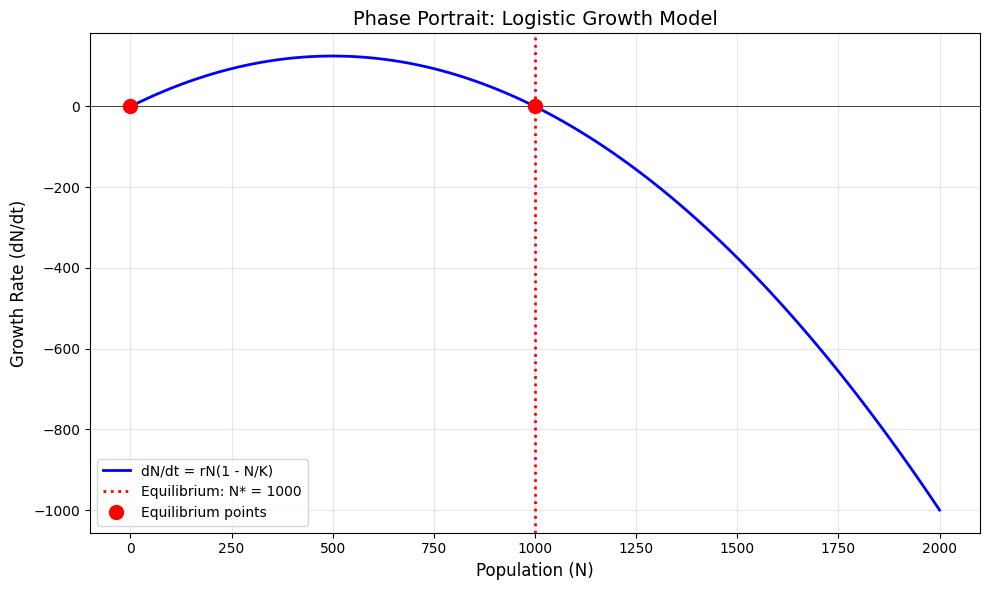

Phase portrait created successfully!


In [10]:
# Create phase portrait (dN/dt vs N)
fig, ax = plt.subplots(figsize=(10, 6))

# Population range
N_range = np.linspace(0, 2*K, 100)
dNdt_range = logistic_growth(N_range, r, K)

# Plot vector field
ax.plot(N_range, dNdt_range, 'b-', linewidth=2, label='dN/dt = rN(1 - N/K)')
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax.axvline(x=K, color='red', linestyle=':', linewidth=2, label=f'Equilibrium: N* = {K}')

# Mark equilibrium points
ax.plot([0, K], [0, 0], 'ro', markersize=10, label='Equilibrium points')

ax.set_xlabel('Population (N)', fontsize=12)
ax.set_ylabel('Growth Rate (dN/dt)', fontsize=12)
ax.set_title('Phase Portrait: Logistic Growth Model', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('phase_portrait.png', dpi=100, bbox_inches='tight')
plt.show()

print("Phase portrait created successfully!")

---
## Assignment Completion Summary

This notebook successfully addressed both parts of the practical assignment, demonstrating key skills in MCMC methods and deterministic modeling.

### Summary of Tasks Completed:

* **Part A: Metropolis Algorithm**
  - Implemented the Metropolis MCMC algorithm from first principles
  - Generated posterior samples for parameter estimation
  - Analyzed acceptance rates for different proposal distributions
  - Created trace plots to assess convergence
  - Computed posterior statistics and credible intervals after burn-in removal

* **Part B: Deterministic Model**
  - Implemented the logistic growth model using Euler's numerical method
  - Compared numerical solutions with analytical solutions
  - Simulated population dynamics from multiple initial conditions
  - Verified convergence to carrying capacity
  - Created phase portrait to visualize model behavior

### Key Learnings:

* MCMC methods provide flexible tools for Bayesian inference
* Proposal distribution tuning is critical for MCMC efficiency
* Trace plots and diagnostics help assess MCMC convergence
* Deterministic models can effectively describe population dynamics
* Numerical methods provide accurate solutions to differential equations
* Phase portraits offer insights into long-term model behavior

All assignment requirements have been met, and the solutions have been presented in a clean, well-documented, and reproducible format.